In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('heart_disease.csv', index_col=False)
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [ ]:
data.shape

(1025, 14)

In [ ]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
duplicated_rows = data.duplicated()

In [ ]:
duplicated_rows.sum()

np.int64(723)

In [ ]:
data = data[~duplicated_rows]

In [ ]:
data.shape

(302, 14)

In [ ]:
data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,False,False,False,False,False,False,False,False,False,False,False,False,False,False
733,False,False,False,False,False,False,False,False,False,False,False,False,False,False
739,False,False,False,False,False,False,False,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


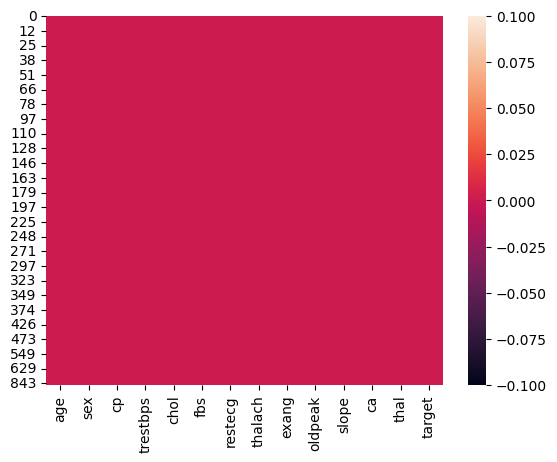

In [ ]:
sns.heatmap(data.isna())
plt.show()

In [ ]:
num_df = data.select_dtypes(include = "number")
cat_df = data.select_dtypes(include = "object_")

In [ ]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)
print("Categorical columns are")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Numerical columns are
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Categorical columns are
[]


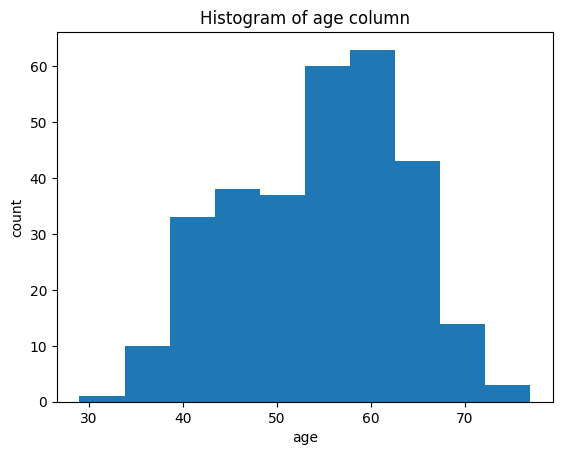

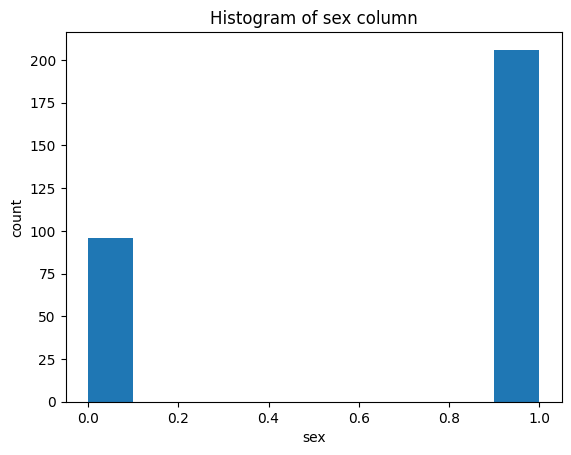

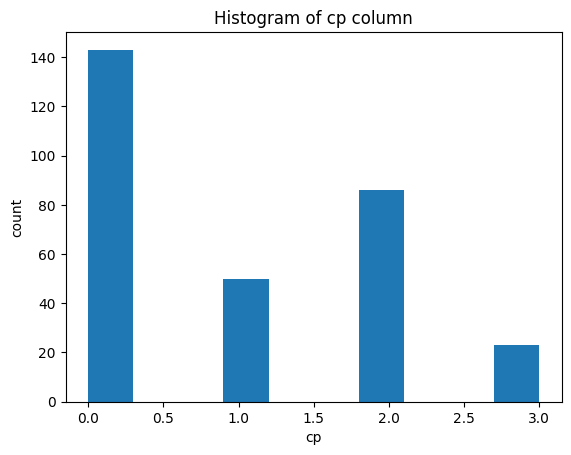

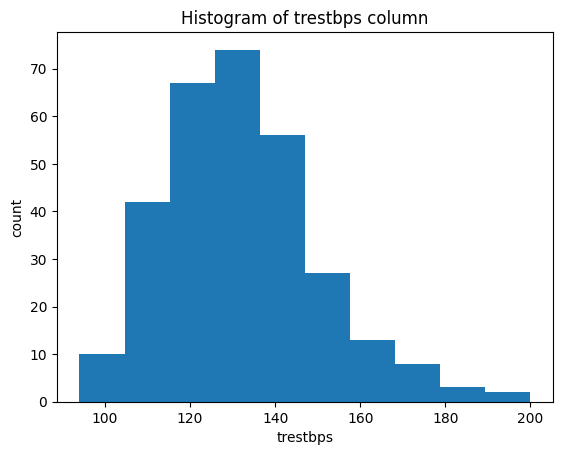

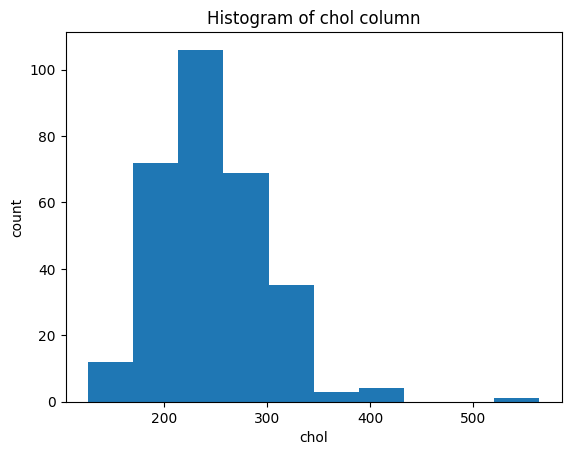

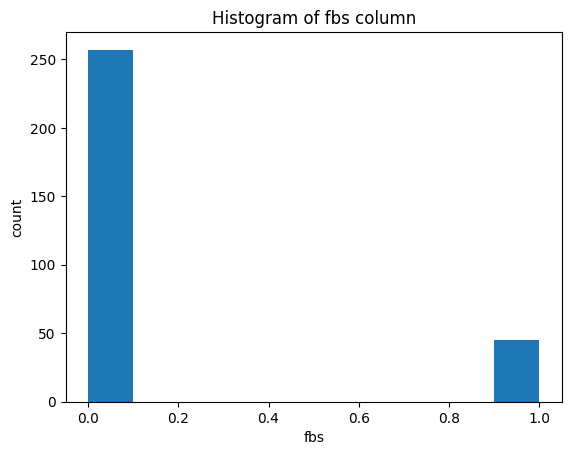

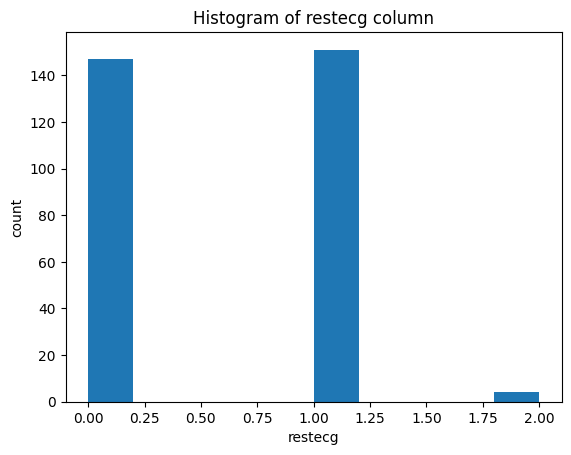

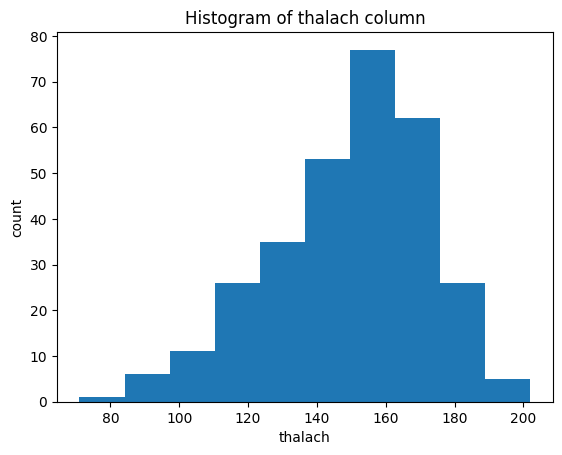

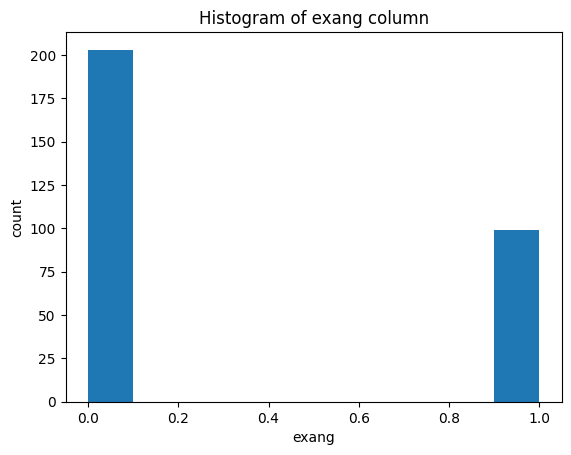

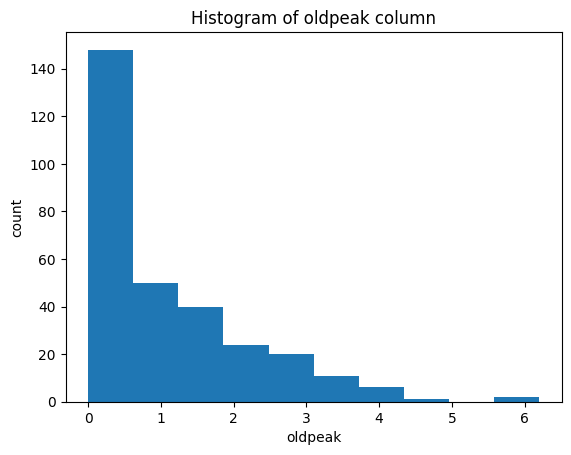

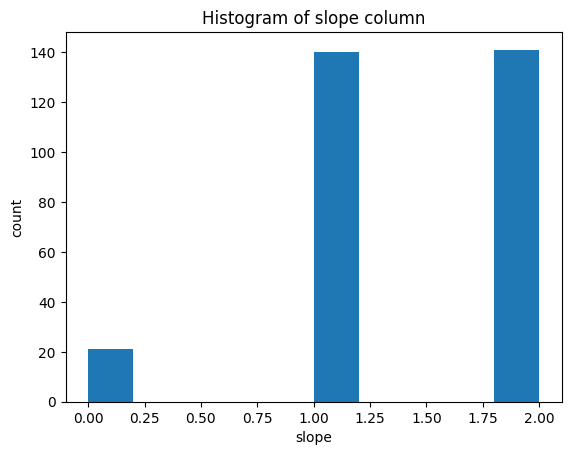

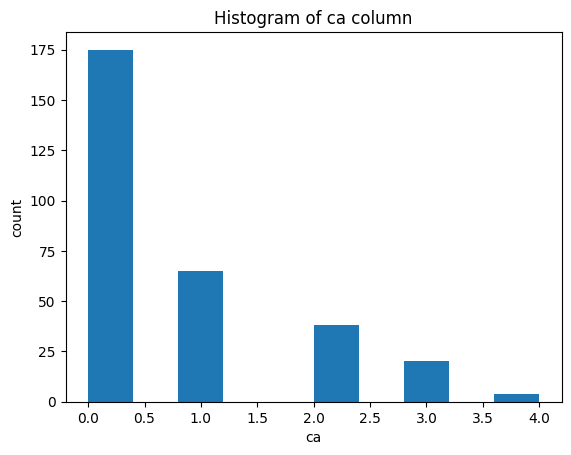

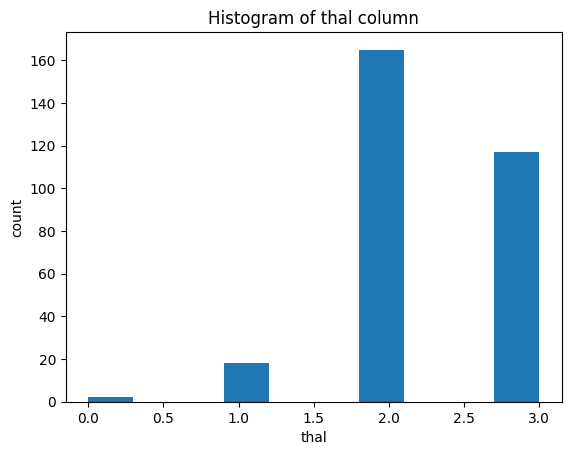

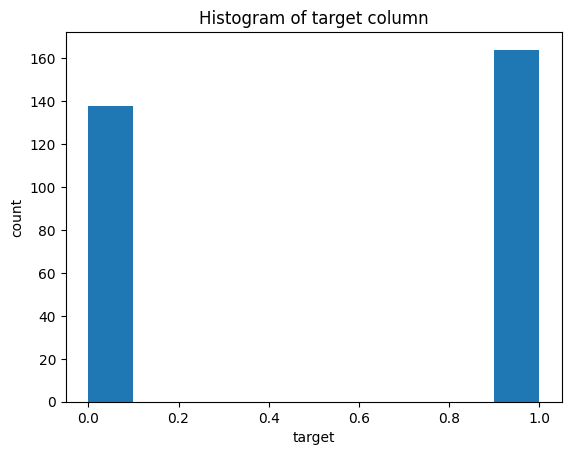

In [ ]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

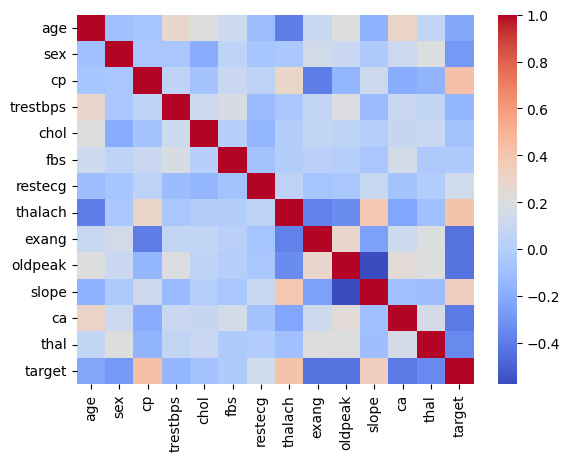

In [ ]:
sns.heatmap(num_df.corr(), annot=False, cmap='coolwarm')
plt.show()

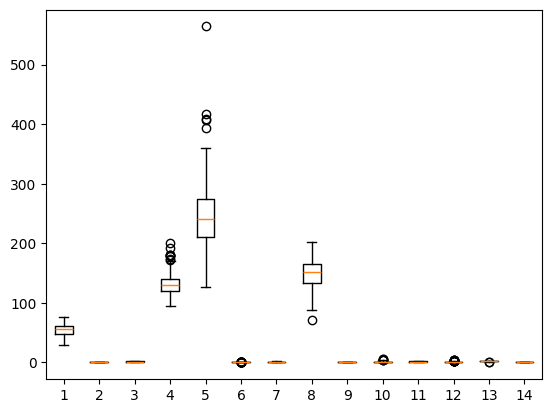

In [ ]:
plt.boxplot(num_df)
plt.show()

In [ ]:
def remove_outliers(df,column_name):
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df[column_name] = df[column_name].clip(upper=upper_bound)
        df[column_name] = df[column_name].clip(lower=lower_bound)
        return df[column_name]

In [ ]:
for col in num_cols:
  num_df[col] = remove_outliers(num_df, col)

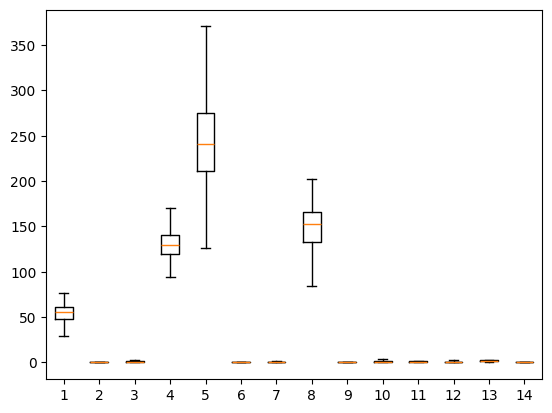

In [ ]:
plt.boxplot(num_df)
plt.show()

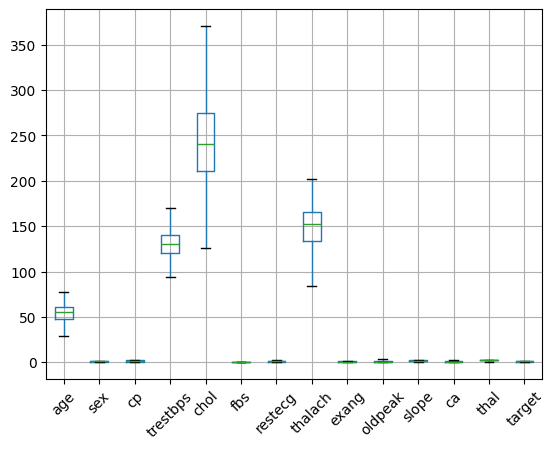

In [ ]:
num_df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [ ]:
data['chol'].value_counts()

,count
chol,
204,6
197,6
234,6
212,5
269,5
...,...
262,1
195,1
166,1


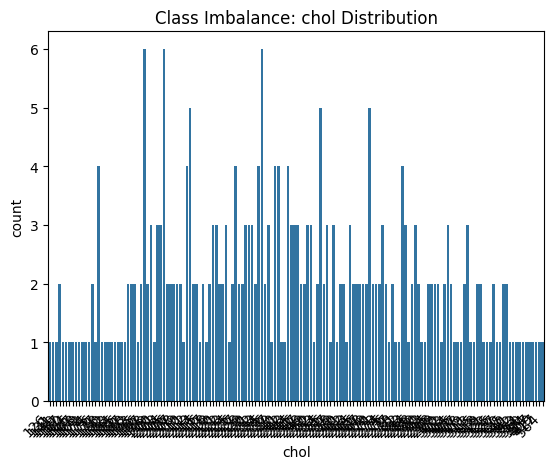

In [ ]:
sns.countplot(x='chol', data=data)
plt.title('Class Imbalance: chol Distribution')
plt.xlabel('chol')
plt.ylabel('count')
plt.xticks(rotation=45, ha = 'right')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
x = data.drop('chol', axis = 1)
y = data['chol']
oversampler = RandomOverSampler()
x_resampled, y_resampled = oversampler.fit_resample(x, y)

chol
212    6
203    6
174    6
294    6
248    6
      ..
262    6
195    6
166    6
178    6
141    6
Name: count, Length: 152, dtype: int64


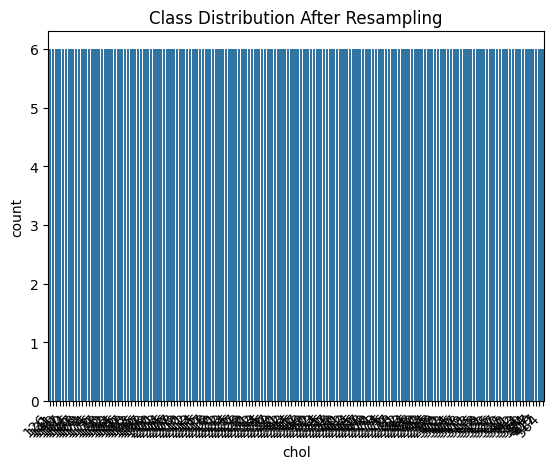

In [ ]:
balanced_data = pd.DataFrame(x_resampled, columns=x.columns)
balanced_data['chol'] = y_resampled
# check the class distribution after resampling
print(balanced_data['chol'].value_counts())

sns.countplot(x='chol', data=balanced_data)
plt.title('Class Distribution After Resampling')
plt.xlabel('chol')
plt.ylabel('count')
plt.xticks(rotation=45, ha = 'right')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
num_df = std_scaler.fit_transform(num_df)

In [ ]:
import pickle
with open('std_scaler.pkl', 'wb') as f:
    pickle.dump(std_scaler, f)

In [ ]:
with open('std_scaler.pkl', 'rb') as f:
    std_scaler = pickle.load(f)

In [ ]:
y = data["trestbps"]
x = data.drop("trestbps", axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,48,1,0,274,0,0,166,0,0.5,1,0,3,0
291,58,1,0,259,0,0,130,1,3.0,1,2,3,0
280,45,0,1,234,0,0,175,0,0.6,1,0,2,1
85,44,1,1,220,0,1,170,0,0.0,2,0,2,1
239,62,0,0,244,0,1,154,1,1.4,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,67,1,0,237,0,1,71,0,1.0,1,0,2,0
77,63,1,0,187,0,0,144,1,4.0,2,2,3,0
125,60,0,3,240,0,1,171,0,0.9,2,0,2,1
522,67,0,2,277,0,1,172,0,0.0,2,1,2,1
